<a href="https://colab.research.google.com/github/Prateek1337/Image_Super_resolution/blob/master/prepare_data_scaled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 butterfly.png		 prepare_data.py	    test.h5
 crop_train.h5		 __pycache__		    TestScaled.h5
 face.png		 SRCNN_check915.h5	    trainFinalBSDS200.h5
'Input to the 915.png'	 SRCNN_check935BSDS200.h5   trainFinalG100.h5
'Input to the 935.png'	 SRCNN_check935G100.h5	    trainFinalT91.h5
'Input to the 955.png'	 SRCNN_check935.h5	    train.h5
'Output of the915.png'	 SRCNN_check935T91.h5	    TrainScaled.h5
'Output of the935.png'	 SRCNN_check955.h5	    VDSR_ADAM_91_15.h5
'Output of the955.png'	 testFinal.h5		    VDSR_ADAM_91_5.h5


In [8]:
import os 
os.chdir("/content/drive/My Drive/Image_resolution_dataset")
os.getcwd()
!ls
DATA_PATH = "/content/drive/My Drive/Image_resolution_dataset/SR_training_datasets/T91"
TEST_PATH = "/content/drive/My Drive/Image_resolution_dataset/SR_testing_datasets/Set14"
names = os.listdir(DATA_PATH)
names = sorted(names)
nums = names.__len__()
print(names,nums,sep="\n\n")

crop_train.h5	     SR_training_datasets  test_rgb.h5
SR_testing_datasets  test.h5		   train_rgb.h5
['t1.png', 't10.png', 't11.png', 't12.png', 't13.png', 't14.png', 't15.png', 't16.png', 't17.png', 't18.png', 't19.png', 't2.png', 't20.png', 't21.png', 't22.png', 't23.png', 't24.png', 't25.png', 't26.png', 't27.png', 't28.png', 't29.png', 't3.png', 't30.png', 't31.png', 't32.png', 't33.png', 't34.png', 't35.png', 't36.png', 't37.png', 't38.png', 't39.png', 't4.png', 't40.png', 't42.png', 't43.png', 't44.png', 't45.png', 't46.png', 't47.png', 't48.png', 't49.png', 't5.png', 't50.png', 't51.png', 't52.png', 't53.png', 't54.png', 't55.png', 't56.png', 't57.png', 't58.png', 't59.png', 't6.png', 't60.png', 't61.png', 't62.png', 't63.png', 't64.png', 't65.png', 't66.png', 't7.png', 't8.png', 't9.png', 'tt1.png', 'tt10.png', 'tt12.png', 'tt13.png', 'tt14.png', 'tt15.png', 'tt16.png', 'tt17.png', 'tt18.png', 'tt19.png', 'tt2.png', 'tt20.png', 'tt21.png', 'tt22.png', 'tt23.png', 'tt24.png', 'tt2

291


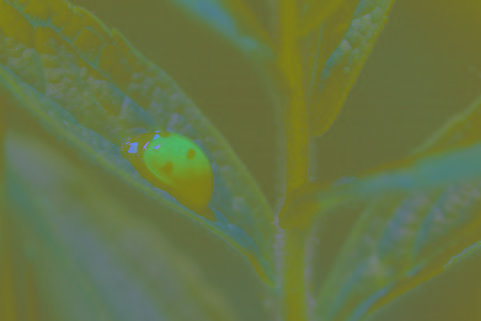

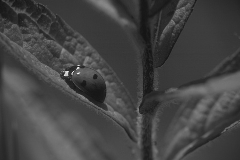

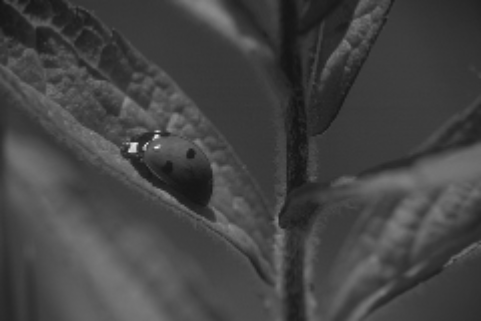

______________________________________________________________


Scale 2 is done


_________________________________________________________________


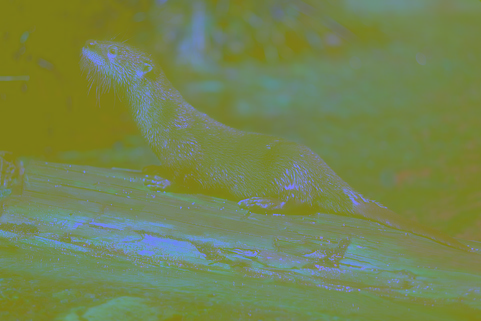

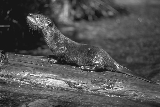

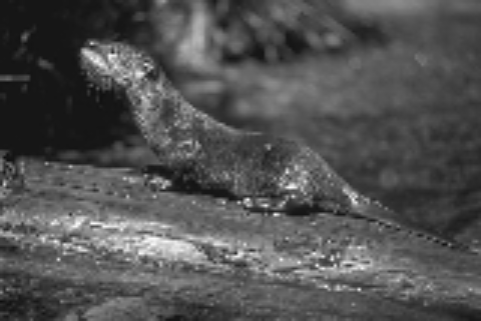

________________________________________


Scale3 is done


____________________________________________________________-


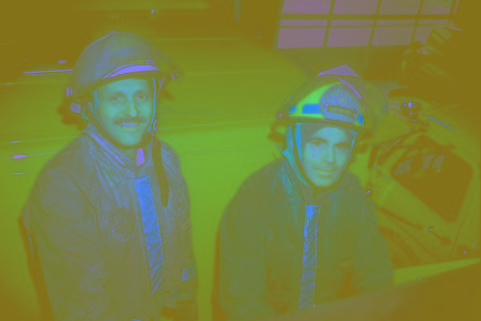

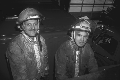

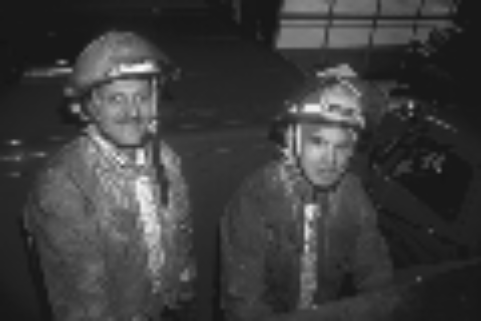

23974 23974
23974


In [10]:
import os
import cv2
import h5py
import numpy
from google.colab.patches import cv2_imshow
from google.colab import files
import random

DATA_PATH = "/content/drive/My Drive/Image_resolution_dataset/SR_training_datasets/291/"
TEST_PATH = "/content/drive/My Drive/Image_resolution_dataset/SR_testing_datasets/Set14/"
Random_Crop = 30
Patch_size = 41
label_size = 41
#conv_side = 6
scale = 2


def prepare_data(_path):
    names = os.listdir(_path)
    names = sorted(names)
    nums = names.__len__()

    data = numpy.zeros((nums * Random_Crop, 1, Patch_size, Patch_size), dtype=numpy.double)
    label = numpy.zeros((nums * Random_Crop, 1, label_size, label_size), dtype=numpy.double)

    for i in range(0,nums//3):
        name = _path + names[i]
        #print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        shape = hr_img.shape

        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        hr_img = hr_img[:, :, 0]

        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] / scale), int(shape[0] / scale)))
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))

        # produce Random_Crop random coordinate to crop training img
        Points_x = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)
        Points_y = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)

        for j in range(Random_Crop):
            lr_patch = lr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]
            hr_patch = hr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]

            lr_patch = lr_patch.astype(float) / 255.
            hr_patch = hr_patch.astype(float) / 255.

            data[i * Random_Crop + j, 0, :, :] = lr_patch
            label[i * Random_Crop + j, 0, :, :] = hr_patch
    for i in range(nums//3,2*(nums//3)):
        name = _path + names[i]
        #print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        shape = hr_img.shape

        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        hr_img = hr_img[:, :, 0]

        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] /3), int(shape[0] / 3)))
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))

        # produce Random_Crop random coordinate to crop training img
        Points_x = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)
        Points_y = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)

        for j in range(Random_Crop):
            lr_patch = lr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]
            hr_patch = hr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]

            lr_patch = lr_patch.astype(float) / 255.
            hr_patch = hr_patch.astype(float) / 255.

            data[i * Random_Crop + j, 0, :, :] = lr_patch
            label[i * Random_Crop + j, 0, :, :] = hr_patch
    for i in range(2*(nums//3),nums):
        name = _path + names[i]
        #print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        shape = hr_img.shape

        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        hr_img = hr_img[:, :, 0]

        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] /4), int(shape[0] / 4)))
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))

        # produce Random_Crop random coordinate to crop training img
        Points_x = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)
        Points_y = numpy.random.randint(0, min(shape[0], shape[1]) - Patch_size, Random_Crop)

        for j in range(Random_Crop):
            lr_patch = lr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]
            hr_patch = hr_img[Points_x[j]: Points_x[j] + Patch_size, Points_y[j]: Points_y[j] + Patch_size]

            lr_patch = lr_patch.astype(float) / 255.
            hr_patch = hr_patch.astype(float) / 255.

            data[i * Random_Crop + j, 0, :, :] = lr_patch
            label[i * Random_Crop + j, 0, :, :] = hr_patch
            # cv2.imshow("lr", lr_patch)
            # cv2.imshow("hr", hr_patch)
            # cv2.waitKey(0)
    return data, label

# BORDER_CUT = 8
BLOCK_STEP = 32
BLOCK_SIZE = 41


def prepare_crop_data(_path):
    names = os.listdir(_path)

    #names = sorted(names)
    nums = names.__len__()
    print(nums)
    data = []
    label = []

    for i in range(0,nums//3):
        name = _path + names[i]
       # print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        if i==4:
          cv2_imshow(hr_img)
        hr_img = hr_img[:, :, 0]
        shape = hr_img.shape

        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] / scale), int(shape[0] / scale)))
        if i==4:
          cv2_imshow(lr_img)
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))
        if i==4:
          cv2_imshow(lr_img)
        width_num = int((shape[0] - BLOCK_SIZE)/BLOCK_STEP)
        height_num = int((shape[1] - BLOCK_SIZE)/BLOCK_STEP)
        for k in range(width_num):
            for j in range(height_num):
                x = k * BLOCK_STEP
                y = j * BLOCK_STEP
                hr_patch = hr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]
                lr_patch = lr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]
                
                lr_patch = lr_patch.astype(float) / 255.
                hr_patch = hr_patch.astype(float) / 255.

                lr = numpy.zeros((1, Patch_size, Patch_size), dtype=numpy.double)
                hr = numpy.zeros((1, label_size, label_size), dtype=numpy.double)
                # print(lr_patch.shape)
                lr[0, :, :] = lr_patch
                hr[0, :, :] = hr_patch

                data.append(lr)
                label.append(hr)
    print("______________________________________________________________\n\n\nScale 2 is done\n\n\n_________________________________________________________________")
    for i in range(nums//3,2*(nums//3)):
        name = _path + names[i]
       # print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        if i==(nums//2):
          cv2_imshow(hr_img)
        hr_img = hr_img[:, :, 0]
        shape = hr_img.shape

        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] / 3), int(shape[0] / 3)))
        if i==nums//2:
          cv2_imshow(lr_img)
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))
        if i==nums//2:
          cv2_imshow(lr_img)
        width_num = int((shape[0] - BLOCK_SIZE)/BLOCK_STEP)
        height_num = int((shape[1] - BLOCK_SIZE)/BLOCK_STEP)
        for k in range(width_num):
            for j in range(height_num):
                x = k * BLOCK_STEP
                y = j * BLOCK_STEP
                hr_patch = hr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]
                lr_patch = lr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]

                lr_patch = lr_patch.astype(float) / 255.
                hr_patch = hr_patch.astype(float) / 255.

                lr = numpy.zeros((1, Patch_size, Patch_size), dtype=numpy.double)
                hr = numpy.zeros((1, label_size, label_size), dtype=numpy.double)
                # print(lr_patch.shape)
                lr[0, :, :] = lr_patch
                hr[0, :, :] = hr_patch

                data.append(lr)
                label.append(hr)
    print("________________________________________\n\n\nScale3 is done\n\n\n____________________________________________________________-")
    for i in range(2*(nums//3),nums):
        name = _path + names[i]
       # print(name)
        hr_img = cv2.imread(name, cv2.IMREAD_COLOR)
        hr_img = cv2.cvtColor(hr_img, cv2.COLOR_BGR2YCrCb)
        if i==nums-1:
          cv2_imshow(hr_img)
        hr_img = hr_img[:, :, 0]
        shape = hr_img.shape
        
        # two resize operation to produce training data and labels
        lr_img = cv2.resize(hr_img, (int(shape[1] / 4), int(shape[0] / 4)))
        if i==nums-1:
          cv2_imshow(lr_img)
        lr_img = cv2.resize(lr_img, (shape[1], shape[0]))
        if i==nums-1:
          cv2_imshow(lr_img)
        width_num = int((shape[0] - BLOCK_SIZE)/BLOCK_STEP)
        height_num = int((shape[1] - BLOCK_SIZE)/BLOCK_STEP)
        for k in range(width_num):
            for j in range(height_num):
                x = k * BLOCK_STEP
                y = j * BLOCK_STEP
                hr_patch = hr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]
                lr_patch = lr_img[x: x + BLOCK_SIZE, y: y + BLOCK_SIZE]

                lr_patch = lr_patch.astype(float) / 255.
                hr_patch = hr_patch.astype(float) / 255.

                lr = numpy.zeros((1, Patch_size, Patch_size), dtype=numpy.double)
                hr = numpy.zeros((1, label_size, label_size), dtype=numpy.double)
                # print(lr_patch.shape)
                lr[0, :, :] = lr_patch
                hr[0, :, :] = hr_patch

                data.append(lr)
                label.append(hr)
    print(len(data),len(label))
    temp=list(zip(data,label))
    print(len(temp))
    random.shuffle(temp)
    data=[x[0] for x in temp]
    label=[x[1] for x in temp]
    data = numpy.array(data, dtype=float)
    label = numpy.array(label, dtype=float)
    return data, label



def write_hdf5(data, labels, output_filename):
    """
    This function is used to save image data and its label(s) to hdf5 file.
    output_file.h5,contain data and label
    """

    x = data.astype(numpy.float32)
    y = labels.astype(numpy.float32)
    os.chdir("/content/drive/My Drive/Image_Resolution")

    with h5py.File(output_filename, 'w') as h:
        h.create_dataset('data', data=x, shape=x.shape)
        h.create_dataset('label', data=y, shape=y.shape)


def read_training_data(file):
    with h5py.File(file, 'r') as hf:
        data = numpy.array(hf.get('data'))
        label = numpy.array(hf.get('label'))
        train_data = numpy.transpose(data, (0, 2, 3, 1))
        train_label = numpy.transpose(label, (0, 2, 3, 1))
        return train_data, train_label






if __name__ == "__main__":
     data, label = prepare_crop_data(DATA_PATH)
     write_hdf5(data, label, "TrainScaled.h5")
     data, label = prepare_data(TEST_PATH)
     write_hdf5(data, label, "TestScaled.h5")
    #data, label=prepare_crop_data_rgb(DATA_PATH)
    #write_hdf5(data,label,"train_rgb.h5")
    #data, label=prepare_data_rgb(TEST_PATH)
    #write_hdf5(data,label,"test_rgb.h5")
    # _, _a = read_training_data("train.h5")
    # _, _a = read_training_data("test.h5")	